# Data

In [1]:
import pandas as pd


### API URLs ###
# Namara.io API Key
api_key = 'a144567820fbe7c8b88771e3ab2c25ea9e03dc5bc105dad4ef1e9514fa466fb2'

# TORONTO: SAFETY INDICATORS (2014)
api_url_safety = 'https://api.namara.io/v0/data_sets/b668078d-7fb2-4ab0-9c7b-7c39f744b63c/data/en-0?api_key='

# TORONTO: POPULATION BY AGE (2014)
api_url_pop = 'https://api.namara.io/v0/data_sets/728b9e5a-70c0-4a4f-aa6d-62282aaceae4/data/en-0?api_key='

# TORONTO: TORONTO COMMUNITY HOUSING DATA
api_url_housing = 'https://api.namara.io/v0/data_sets/4ed214fd-7401-4162-a668-30d12e58cd38/data/en-1?api_key='

In [2]:
### Load Data ###
data_housing = pd.read_json(api_url_housing + api_key)
data_safety = pd.read_json(api_url_safety + api_key)
data_pop = pd.read_json(api_url_pop + api_key)

In [3]:
# 1. Decide which features you want to keep from each dataset
# 2. Use data_safety as base, remove unwanted features and add data_pop features
# 3. data_housing needs to be aggregated/group for total residents per neighbourhood

print data_housing.shape
data_housing.head(1)

(250, 20)


,bld_desc,bld_id,bldg_postc,buildform,building,dev_id,dev_name,flr_abv_gr,geometry,latitude,longitude,mrkt_unit,nghdnum,objectid,policedivi,rgi_unit,total_resu,x,y,year_built
0,3-Storey Walk-Up Apt. Bldg.,5631,M9P 1T1,Walkup Apartment Building,Towns & Wkups,111,Humber Acres,3,"{u'type': u'Point', u'coordinates': [-79.51653...",43.692662,-79.516537,2,8,550,23,45,47,303451.384,4838967.587,1962


Important fields to keep:

* nghdnum (Neighbourhood Number)
* total_resu (Total Residence)

Only keep housing data where 'year_built' is greater than 2014 (other datasets are restricted to this year).

In [4]:
print data_safety.shape
data_safety.head(1)

(140, 14)


,arsons,assaults,break_enters,fire_fire_alarms,fire_medical_calls,fire_vehicle_incidents,hazardous_incidents,murders,neighbourhood,num,robberies,sexual_assaults,thefts,vehicle_thefts
0,0,66,46,128,275,79,58,1,Agincourt North,129,34,12,1,16


Important fields to keep: All

Will group some such as, robberies and theft or fire_fire_alarms, fire_medical_calls and fire_vehicle_incidents

In [5]:
print data_pop.shape
data_pop.head(1)

(140, 22)


,neighbourhood,num,pop_0_4,pop_10_14,pop_15_19,pop_20_24,pop_25_29,pop_30_34,pop_35_39,pop_40_44,...,pop_55_59,pop_5_to_9,pop_60_64,pop_65_69,pop_70_74,pop_75_79,pop_80_84,pop_85_and_over,pop_female,pop_male
0,Agincourt North,129,"1,320.00","1,560.00","2,000.00","2,165.00","2,145.00","1,685.00","1,715.00","2,125.00",...,"2,105.00","1,345.00","2,000.00","1,430.00","1,245.00","1,025.00",745,650,15845,14445


Important fields to keep:

* num (Neighbourhood Number)
* pop_female
* pop_male

In [6]:
data_safety.head()

,arsons,assaults,break_enters,fire_fire_alarms,fire_medical_calls,fire_vehicle_incidents,hazardous_incidents,murders,neighbourhood,num,robberies,sexual_assaults,thefts,vehicle_thefts
0,0,66,46,128,275,79,58,1,Agincourt North,129,34,12,1,16
1,0,108,73,168,316,158,70,0,Agincourt South-Malvern West,128,24,20,19,32
2,1,44,24,106,170,54,42,1,Alderwood,20,6,5,7,9
3,3,219,156,770,940,135,243,0,Annex,95,34,28,22,14
4,1,61,65,288,544,144,118,0,Banbury-Don Mills,42,12,8,10,20


In [7]:
# Add population totals and safety numbers to new dataset
data = pd.concat([data_safety, data_pop['pop_female'], data_pop['pop_male']], axis=1)
data.head()

,arsons,assaults,break_enters,fire_fire_alarms,fire_medical_calls,fire_vehicle_incidents,hazardous_incidents,murders,neighbourhood,num,robberies,sexual_assaults,thefts,vehicle_thefts,pop_female,pop_male
0,0,66,46,128,275,79,58,1,Agincourt North,129,34,12,1,16,15845,14445
1,0,108,73,168,316,158,70,0,Agincourt South-Malvern West,128,24,20,19,32,11350,10630
2,1,44,24,106,170,54,42,1,Alderwood,20,6,5,7,9,6130,5765
3,3,219,156,770,940,135,243,0,Annex,95,34,28,22,14,15415,13745
4,1,61,65,288,544,144,118,0,Banbury-Don Mills,42,12,8,10,20,14430,12485


In [8]:
data['num'].describe()

count    140.0000
mean      70.5000
std       40.5586
min        1.0000
25%       35.7500
50%       70.5000
75%      105.2500
max      140.0000
Name: num, dtype: float64

In [9]:
# Group housing totals by neighbourhood number
# Add total neighbourhood number to new dataset

# RGI -> Rent-Geared-Income
data_housing_grp_by_nghdum = data_housing.groupby('nghdnum')['total_resu'].sum()

# Verify numbers
print data_housing.loc[data_housing['nghdnum'] == 5]['total_resu'].sum()
data_housing_grp_by_nghdum.head()

115


nghdnum
1    204
2     74
4     64
5    115
6    360
Name: total_resu, dtype: int64

In [10]:
# Add 'total_resu' to dataset matching up housing 'nghdum' to dataset 'num' value
data_housing_by_nghdum = data_housing_grp_by_nghdum[data['num']].reset_index()
data_housing_by_nghdum.head()

,num,total_resu
0,129,NaN
1,128,NaN
2,20,NaN
3,95,NaN
4,42,NaN


In [11]:
data = pd.concat([data, data_housing_by_nghdum['total_resu'].fillna(0)], axis=1)
data.head(15)

,arsons,assaults,break_enters,fire_fire_alarms,fire_medical_calls,fire_vehicle_incidents,hazardous_incidents,murders,neighbourhood,num,robberies,sexual_assaults,thefts,vehicle_thefts,pop_female,pop_male,total_resu
0,0,66,46,128,275,79,58,1,Agincourt North,129,34,12,1,16,15845,14445,0.0
1,0,108,73,168,316,158,70,0,Agincourt South-Malvern West,128,24,20,19,32,11350,10630,0.0
2,1,44,24,106,170,54,42,1,Alderwood,20,6,5,7,9,6130,5765,0.0
3,3,219,156,770,940,135,243,0,Annex,95,34,28,22,14,15415,13745,0.0
4,1,61,65,288,544,144,118,0,Banbury-Don Mills,42,12,8,10,20,14430,12485,0.0
5,0,43,32,153,310,34,106,0,Bathurst Manor,34,6,11,2,36,8050,7380,0.0
6,3,588,97,"1,428.00","1,454.00",268,189,1,Bay Street Corridor,76,104,71,53,24,10030,9315,0.0
7,0,79,47,201,196,106,72,0,Bayview Village,52,12,14,11,25,9420,8245,0.0
8,1,37,22,99,256,28,33,0,Bayview Woods-Steeles,49,6,3,4,16,7275,6260,0.0
9,1,54,84,256,496,142,140,0,Bedford Park-Nortown,39,12,5,11,42,12470,10720,0.0


In [12]:
# Add total population and percentage of pop. that is community housing 
total_pop = data['pop_female'] + data['pop_male']
total_pop.rename('total_pop', inplace=True)

comm_housing = data['total_resu'] / total_pop
comm_housing.rename('comm_housing_pop_ratio', inplace=True)

data = pd.concat([data, total_pop, comm_housing], axis=1)
data.head(15)

,arsons,assaults,break_enters,fire_fire_alarms,fire_medical_calls,fire_vehicle_incidents,hazardous_incidents,murders,neighbourhood,num,robberies,sexual_assaults,thefts,vehicle_thefts,pop_female,pop_male,total_resu,total_pop,comm_housing_pop_ratio
0,0,66,46,128,275,79,58,1,Agincourt North,129,34,12,1,16,15845,14445,0.0,30290,0.000000
1,0,108,73,168,316,158,70,0,Agincourt South-Malvern West,128,24,20,19,32,11350,10630,0.0,21980,0.000000
2,1,44,24,106,170,54,42,1,Alderwood,20,6,5,7,9,6130,5765,0.0,11895,0.000000
3,3,219,156,770,940,135,243,0,Annex,95,34,28,22,14,15415,13745,0.0,29160,0.000000
4,1,61,65,288,544,144,118,0,Banbury-Don Mills,42,12,8,10,20,14430,12485,0.0,26915,0.000000
5,0,43,32,153,310,34,106,0,Bathurst Manor,34,6,11,2,36,8050,7380,0.0,15430,0.000000
6,3,588,97,"1,428.00","1,454.00",268,189,1,Bay Street Corridor,76,104,71,53,24,10030,9315,0.0,19345,0.000000
7,0,79,47,201,196,106,72,0,Bayview Village,52,12,14,11,25,9420,8245,0.0,17665,0.000000
8,1,37,22,99,256,28,33,0,Bayview Woods-Steeles,49,6,3,4,16,7275,6260,0.0,13535,0.000000
9,1,54,84,256,496,142,140,0,Bedford Park-Nortown,39,12,5,11,42,12470,10720,0.0,23190,0.000000


/Applications/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


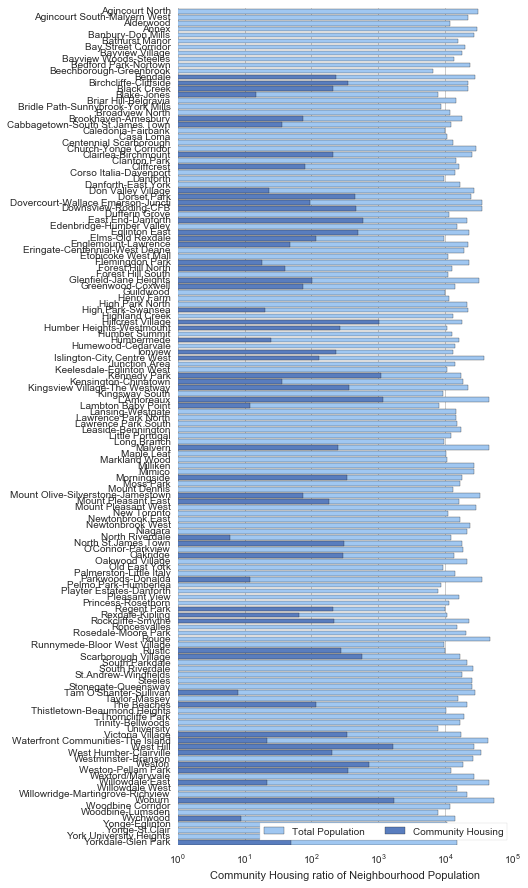

In [13]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total population
sns.set_color_codes("pastel")
sns.barplot(x="total_pop", y="neighbourhood", data=data,
            label="Total Population", color="b")

# Plot the community housing per neighbourhood
sns.set_color_codes("muted")
sns.barplot(x="total_resu", y="neighbourhood", data=data,
            label="Community Housing", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="", xscale='log',
       xlabel="Community Housing ratio of Neighbourhood Population")
sns.despine(left=True, bottom=True)


In [14]:
data.tail(10)

,arsons,assaults,break_enters,fire_fire_alarms,fire_medical_calls,fire_vehicle_incidents,hazardous_incidents,murders,neighbourhood,num,robberies,sexual_assaults,thefts,vehicle_thefts,pop_female,pop_male,total_resu,total_pop,comm_housing_pop_ratio
130,1,82,29,179,279,51,67,0,Willowdale West,37,11,14,4,11,7920,7085,0.0,15005,0.000000
131,0,85,43,272,461,75,123,0,Willowridge-Martingrove-Richview,7,20,24,4,45,11145,10190,0.0,21335,0.000000
132,5,355,120,581,876,212,208,3,Woburn,137,86,51,11,45,27330,26005,1706.0,53335,0.031987
133,1,89,32,96,202,43,44,0,Woodbine Corridor,64,13,8,2,7,6070,5640,0.0,11710,0.000000
134,0,47,35,48,92,6,39,0,Woodbine-Lumsden,60,5,12,2,2,4080,3745,0.0,7825,0.000000
135,1,57,32,181,388,49,78,0,Wychwood,94,19,13,3,5,7525,6460,9.0,13985,0.000644
136,0,65,36,210,281,58,77,0,Yonge-Eglinton,100,15,14,5,12,5530,5045,0.0,10575,0.000000
137,0,21,37,191,195,28,56,0,Yonge-St.Clair,97,6,0,4,2,6420,5235,0.0,11655,0.000000
138,3,283,108,773,709,175,142,1,York University Heights,27,68,40,31,107,14125,13580,0.0,27705,0.000000
139,0,102,51,288,544,171,109,1,Yorkdale-Glen Park,31,20,14,22,69,7940,6750,50.0,14690,0.003404


In [15]:
data.dtypes

arsons                      int64
assaults                    int64
break_enters                int64
fire_fire_alarms           object
fire_medical_calls         object
fire_vehicle_incidents      int64
hazardous_incidents         int64
murders                     int64
neighbourhood              object
num                         int64
robberies                   int64
sexual_assaults             int64
thefts                      int64
vehicle_thefts              int64
pop_female                  int64
pop_male                    int64
total_resu                float64
total_pop                   int64
comm_housing_pop_ratio    float64
dtype: object

In [16]:
# Update data types to int64 for better handling in json file
data["fire_fire_alarms"] = data["fire_fire_alarms"].str.replace(',', '').astype(float).astype(int)
data["fire_medical_calls"] = data["fire_medical_calls"].str.replace(',', '').astype(float).astype(int)
data["total_resu"] = data["total_resu"].astype(int)
data["neighbourhood"] = data["neighbourhood"].astype(str)

data.dtypes

arsons                      int64
assaults                    int64
break_enters                int64
fire_fire_alarms            int64
fire_medical_calls          int64
fire_vehicle_incidents      int64
hazardous_incidents         int64
murders                     int64
neighbourhood              object
num                         int64
robberies                   int64
sexual_assaults             int64
thefts                      int64
vehicle_thefts              int64
pop_female                  int64
pop_male                    int64
total_resu                  int64
total_pop                   int64
comm_housing_pop_ratio    float64
dtype: object

In [20]:
# Export data
# data.to_json(path_or_buf='./neighbourhood_crime_data.json', orient='records', double_precision=5)

# [{name: neighbourhood, id: num, total_pop: x, ..., crime: [robberies: x, fire: y, murders: z]}]

data_json = []
crime_types = ["arsons", "assaults", "break_enters", "fire_fire_alarms", "fire_medical_calls",
               "fire_vehicle_incidents", "hazardous_incidents", "murders", 
              "robberies", "sexual_assaults", "thefts", "vehicle_thefts"]

for row in data.iterrows():
    
    index, row_data = row
    
    data_crime = {}
    data_neighbourhood = {}
    
    data_neighbourhood["name"] = row_data["neighbourhood"]
    data_neighbourhood["id"] = row_data["num"]
    data_neighbourhood["total_pop"] = row_data["total_pop"]
    data_neighbourhood["comm_housing_pop_ratio"] = round(row_data["comm_housing_pop_ratio"],5)
    
    data_crime_list = []
    for c_type in crime_types:
        data_crime_type = {}
        data_crime_type[c_type] = row_data[c_type]
        data_crime_list.append(data_crime_type)    
    
    data_neighbourhood["crime_types"] =  data_crime_list
    
    data_json.append(data_neighbourhood)

In [21]:
import json

# data_json is list of dictionaries, strings not formatted correctly
json.dumps(data_json[135])

'{"crime_types": [{"arsons": 1}, {"assaults": 57}, {"break_enters": 32}, {"fire_fire_alarms": 181}, {"fire_medical_calls": 388}, {"fire_vehicle_incidents": 49}, {"hazardous_incidents": 78}, {"murders": 0}, {"robberies": 19}, {"sexual_assaults": 13}, {"thefts": 3}, {"vehicle_thefts": 5}], "total_pop": 13985, "name": "Wychwood", "comm_housing_pop_ratio": 0.00064, "id": 94}'

In [22]:
with open("data_formatted.json", 'wb') as output_file:
    json.dump(data_json, output_file)